Добрый вечер! Сегодня мы проведём исследование по методу k-соседей - методу классификации по определённому признаку. Целью исследования является классификация на предмет процента побед из игры Clash Royale, изучить эффективность моделей с разным количеством k-соседей.

Для начала импортируем необходимые библиотеки и методы из разных библиотек, используемых для машинного обучения:

In [1]:
import pandas
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

C:\Users\a\AppData\Local\Temp\ipykernel_6620\692123924.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


Инициализируем наши данные из игры Clash Royale и создадим массив типа DataFrame:

In [6]:
columns = [
    'Редкость',
    'Скорость атаки',
    'Здоровье',
    'Урон по области',
    'Урон в секунду',
    'Цена',
    'Дальность',
    'Скорость',
    'Лучший процент побед'
]
index = ['Рыцарь', 'Лучницы', 'Гоблины', 'Голблин-гигант', 'Гигант', 'П.Е.К.К.А.', 'Миньоны', 'Шар', 'Ведьма', 'Варвары',
         'Голем', 'Скелеты', 'Валькирия', 'Армия скелетов', 'Подрывник', 'Мушкетер', 'Принцесса', 'Три мушкетера', 'Адская гончая', 'Спарки',
         'Мегаминьон', 'Гоблин с дротиками', 'Банда гоблинов', 'Громовержец', 'Элитные варвары', 'Охотник', 'Палач', 'Бандитка',
         'Королевские рекруты', 'Ночная ведьма', 'Летучие мыши', 'Королевский призрак', 'Всадница на баране']
values =[
    [1, 1.2, 1607, 184, 153, 3, 1, 1, 90.89],
    [1, 0.9, 277, 97, 107, 3, 5, 0.9, 91.37],
    [1, 1.1, 184, 109, 99, 2, 1, 0.25, 75.77],
    [3, 1.5, 3044, 160, 106, 6, 1, 1, 79.43],
    [2, 1.5, 3724, 231, 154, 5, 1, 1, 91.37],
    [3, 1.8, 3431, 744, 413, 7, 1, 1.5, 92.50],
    [1, 1.0, 209, 107, 107, 3, 1, 0.5, 91.37],
    [3, 2.0, 1533, 584, 292, 5, 1, 1, 91.37],
    [3, 1.1, 765, 122, 110, 5, 5.5, 1, 72.00],
    [1, 1.3, 610, 174, 133, 5, 1, 1, 91.37],
    [3, 2.5, 4672, 284, 113, 8, 1, 1.5, 77.37],
    [1, 1.0, 74, 74, 74, 1, 1, 0.5, 90.89],
    [2, 1.5, 1737, 243, 162, 4, 1, 1, 82.22],
    [3, 1.0, 74, 74, 74, 3, 1, 0.5, 85.29],
    [1, 1.8, 302, 202, 112, 2, 4.5, 1, 83.52],
    [2, 1.0, 656, 198, 198, 4, 6, 1, 88.31],
    [4, 3.0, 237, 154, 51, 3, 9, 1, 74.34],
    [2, 1.0, 656*3, 198*3, 198*3, 3*3, 6, 1, 80.00],
    [4, 1.3, 3256, 49, 37, 7, 3.5, 1.5, 99.52],
    [4, 4.0, 1320, 1210, 302, 6, 5, 1.5, 75.77],
    [2, 1.5, 762, 283, 188, 3, 1, 1, 68.62],
    [2, 0.7, 237, 119, 170, 3, 6.5, 0.25, 100.00],
    [1, 1.1, 184, 109, 99, 3, 1, 0.25, 70.75],
    [4, 1.8, 649, 200, 110, 4, 5.0, 0.5, 92.31],
    [1, 1.4, 1220, 349, 249, 6, 1, 0.5, 88.00],
    [3, 2.2, 765, 77, 35, 4, 4.0, 1, 86.67],
    [3, 2.4, 1168, 154*2, 64*2, 5, 4.5, 1.0, 83.33],
    [4, 1.0, 825, 176, 176, 3, 1, 0.5, 67.27],
    [1, 1.3, 484+219, 121, 93, 7, 1, 1, 65.81],
    [4, 1.3, 825, 286, 220, 4, 1, 1, 76.00],
    [1, 1.3, 74, 74, 56, 2, 1, 0.25, 74.36],
    [4, 1.8, 1100, 237, 131, 3, 1, 0.5, 72.00],
    [4, 1.8, 1607, 242+484, 134, 5, 1, 1, 90.00]
]
# Итак, выше - данные с игры, которую я проанализировал и взял данные, где колонки - это характеристики бойцов, указанных в индексах
for i in range(len(values)):
  if values[i][-1] >= 80:
    values[i][-1] = 1
  else:
    values[i][-1] = 0
data = {}

for i in range(len(columns)):
    data[columns[i]] = []
    for i2 in range(len(index)):
        data[columns[i]].append(values[i2][i])
# Создание словаря, объединяющий все данные и колонки воедино

df = pandas.DataFrame(data, index=index)
# Создание типа данных библиотеки Pandas, где вместо номеров (индексов) используются названия персонажей для понятности отображения

df.fillna(0.0)
print('Преобразованная модель массива:')
# Проведение функции, проверяющий целостность массива и заполняющий его недостающими значениями в случае утраты сегмента данных
df

Преобразованная модель массива:


,Редкость,Скорость атаки,Здоровье,Урон по области,Урон в секунду,Цена,Дальность,Скорость,Лучший процент побед
Рыцарь,1,1.2,1607,184,153,3,1.0,1.00,1
Лучницы,1,0.9,277,97,107,3,5.0,0.90,1
Гоблины,1,1.1,184,109,99,2,1.0,0.25,0
Голблин-гигант,3,1.5,3044,160,106,6,1.0,1.00,0
Гигант,2,1.5,3724,231,154,5,1.0,1.00,1
П.Е.К.К.А.,3,1.8,3431,744,413,7,1.0,1.50,1
Миньоны,1,1.0,209,107,107,3,1.0,0.50,1
Шар,3,2.0,1533,584,292,5,1.0,1.00,1
Ведьма,3,1.1,765,122,110,5,5.5,1.00,0
Варвары,1,1.3,610,174,133,5,1.0,1.00,1


Разделим набор данных на тренировочный и тестовый, целевым признаком Y1 является лучший процент побед, однако важно отметить, что мы выше перевели проценты в булевое значение. То есть если процент равен 80 или выше, то карта считается эффективной, следовательно, мы переводим значение в единицу. Если ниже - то неэффективной, и мы переводим значение в нолик. Рассмотрим также значения X_train shape, y_train shape, X_test shape, y_test shape:

In [7]:
X1 = df[['Редкость',
    'Скорость атаки',
    'Здоровье',
    'Урон по области',
    'Урон в секунду',
    'Цена',
    'Дальность',
    'Скорость']]
Y1 = df['Лучший процент побед']

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, train_size=0.7,
random_state=42)

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (23, 8), y_train shape: (23,),
X_test shape: (10, 8), y_test shape: (10,)


Интегрируем в наше решение несколько функций, позволяющих вычислить эффективность моделей для разных случаев (как для тестовых примеров, так и для тренировочные):

In [9]:
def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4,
                   figsize=(10,5), params=False):
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    print(metrics.classification_report(y_train,y_hat_train, digits=digits))
    print("****CLASSIFICATION REPORT - TEST DATA****")
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))
    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")
    fig, axes = plt.subplots(ncols=2,
                             figsize=figsize)
    metrics.ConfusionMatrixDisplay.from_estimator(model, X_test,
                                  y_test,normalize='true',
                                 cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    metrics.RocCurveDisplay.from_estimator(model,X_test,y_test,ax=axes[1])
    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')
    plt.tight_layout()
    plt.show()
    if params == True:
        print("****MODEL PARAMETERS****")
        params = pandas.DataFrame(pandas.Series(model.get_params()))
        params.columns=['parameters']
        display(params)

def split_scale(df, target, scaler=StandardScaler()):
    target = target
    y = df[target]
    X = df.drop(target, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    cols = X_train.columns
    scaler = scaler
    X_train = pandas.DataFrame(scaler.fit_transform(X_train), columns=cols)
    X_test = pandas.DataFrame(scaler.transform(X_test), columns=cols)
    return X_train, X_test, y_train, y_test

def fit_eval(model, X_train, y_train, X_test, y_test, digits=4,figsize=(10,5), params=False):
    model.fit(X_train, y_train)
    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, figsize=figsize, params=params)
    return model

И теперь рассмотрим метод k-ближайших соседей. Для начала немного теории: метод ближайший соседей - это очень популярный метод классификации, используемый в машинном обучении. Он иногда применим в задачах регрессии. Выше мы говорили о качестве классификации методом k-ближайших соседей. Стоит выделить параметры, от которых зависит это самое качество:
1) Число соседей;
2) Метрика расстояния между объектами;
3) Вес соседей.

Попробуем задать число соседей 5:

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test)
knn_predictions

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

Посмотрим уровень точности проведённых операций:

In [11]:
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6


Точность в 0.6 можно назвать неплохой, однако всё еще далека от идеала. Поэтому продолжим рассматривать другие вариации числа соседей.

Попробуем теперь использовать 15 ближайших соседей:

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.3636    0.4000    0.3810        10
           1     0.5000    0.4615    0.4800        13

    accuracy                         0.4348        23
   macro avg     0.4318    0.4308    0.4305        23
weighted avg     0.4407    0.4348    0.4369        23

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         3
           1     0.6250    0.7143    0.6667         7

    accuracy                         0.5000        10
   macro avg     0.3125    0.3571    0.3333        10
weighted avg     0.4375    0.5000    0.4667        10

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


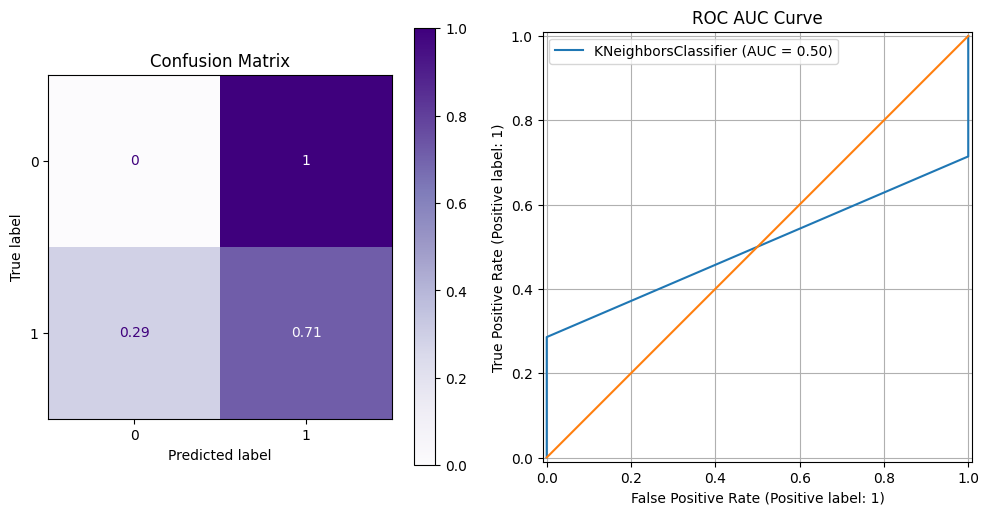

KNeighborsClassifier(n_neighbors=15)

In [12]:
fit_eval(KNeighborsClassifier(n_neighbors=15), \
                      X_train, y_train, \
                      X_test, y_test)

Немного разберёмся со структурой. Cofusion Matrix - это матрица, которая показывает количество верных и неверных значений для эффективности побед в 0 и 1 (то самое булевое значение, над которым мы работали выше). И, исследуя график с матрицей, мы видим, что эффективность тяжело назвать высокой. Наш показатель точности (accuracy) упал до 0.5, следовательно, попробуем еще несколько вариаций числа соседей.              

Для 10 соседей:

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.6667    0.4000    0.5000        10
           1     0.6471    0.8462    0.7333        13

    accuracy                         0.6522        23
   macro avg     0.6569    0.6231    0.6167        23
weighted avg     0.6556    0.6522    0.6319        23

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.2000    0.3333    0.2500         3
           1     0.6000    0.4286    0.5000         7

    accuracy                         0.4000        10
   macro avg     0.4000    0.3810    0.3750        10
weighted avg     0.4800    0.4000    0.4250        10

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


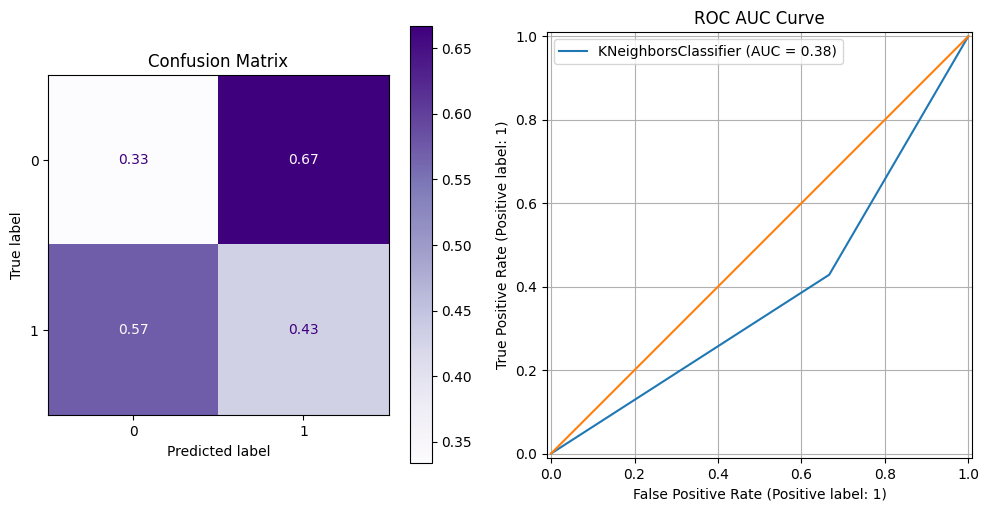

KNeighborsClassifier(n_neighbors=10)

In [13]:
fit_eval(KNeighborsClassifier(n_neighbors=10), \
                      X_train, y_train, \
                      X_test, y_test)

Для 20 соседей:

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        10
           1     0.5652    1.0000    0.7222        13

    accuracy                         0.5652        23
   macro avg     0.2826    0.5000    0.3611        23
weighted avg     0.3195    0.5652    0.4082        23

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         3
           1     0.7000    1.0000    0.8235         7

    accuracy                         0.7000        10
   macro avg     0.3500    0.5000    0.4118        10
weighted avg     0.4900    0.7000    0.5765        10

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


c:\Python\3.11.6\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\3.11.6\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\3.11.6\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\3.11.6\Lib\site-packages\sklearn\metrics\_classificati

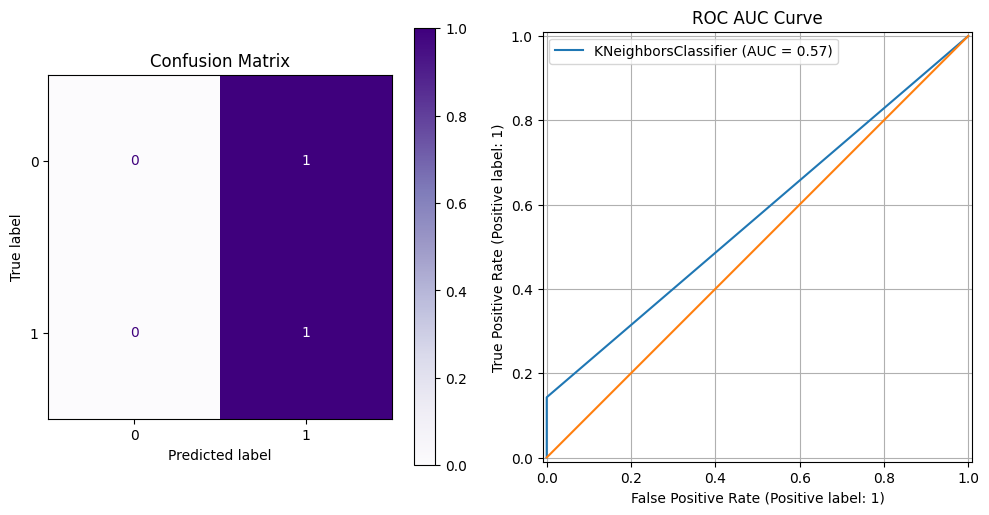

KNeighborsClassifier(n_neighbors=20)

In [14]:
fit_eval(KNeighborsClassifier(n_neighbors=20), \
                      X_train, y_train, \
                      X_test, y_test)

Ситуация имеет некоторые корелляции, однако принципиальный успеха разглядеть тяжело. Перейдём к следующему этапу.

Однако размерность и глобальное различие в признках модели может привести к тому, что варьирование и различие величин значений очень высока. Это может стать проблемой для решений в сфере машинного обучения и многих средств классификаций. Однако была разработана стандартизация - приведение всех значений к определённому виду:

In [15]:
scaler = StandardScaler().set_output(transform="pandas")
scaled_X_train = scaler.fit_transform(X_train)

Рассмотрим стандартизированные данные:

In [16]:
scaled_X_train

,Редкость,Скорость атаки,Здоровье,Урон по области,Урон в секунду,Цена,Дальность,Скорость
Гигант,-0.315063,-0.050308,1.836595,0.009574,0.220339,0.439372,-0.531134,0.441712
Принцесса,1.295259,2.842424,-0.746607,-0.384758,-0.957953,-0.624371,3.378012,0.441712
П.Е.К.К.А.,0.490098,0.528238,1.619537,2.636751,3.183229,1.503116,-0.531134,1.761113
Армия скелетов,0.490098,-1.014552,-0.867359,-0.794454,-0.694839,-0.624371,-0.531134,-0.877688
Скелеты,-1.120224,-1.014552,-0.867359,-0.794454,-0.694839,-1.688115,-0.531134,-0.877688
Элитные варвары,-1.120224,-0.243157,-0.018391,0.613876,1.307113,0.971244,-0.531134,-0.877688
Лучницы,-1.120224,-1.207401,-0.716974,-0.676667,-0.317328,-0.624371,1.423439,0.177832
Гоблины,-1.120224,-0.821704,-0.785870,-0.615212,-0.408846,-1.156243,-0.531134,-1.537389
Ночная ведьма,1.295259,-0.436006,-0.311011,0.291241,0.975361,-0.092499,-0.531134,0.441712
Голблин-гигант,0.490098,-0.050308,1.332844,-0.354031,-0.328768,0.971244,-0.531134,0.441712


Попробуем теперь рассмотреть модель ближайших 15 соседей на стандартизированных данных:

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        10
           1     0.4737    0.6923    0.5625        13

    accuracy                         0.3913        23
   macro avg     0.2368    0.3462    0.2812        23
weighted avg     0.2677    0.3913    0.3179        23

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         3
           1     0.7000    1.0000    0.8235         7

    accuracy                         0.7000        10
   macro avg     0.3500    0.5000    0.4118        10
weighted avg     0.4900    0.7000    0.5765        10

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


c:\Python\3.11.6\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\3.11.6\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\3.11.6\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


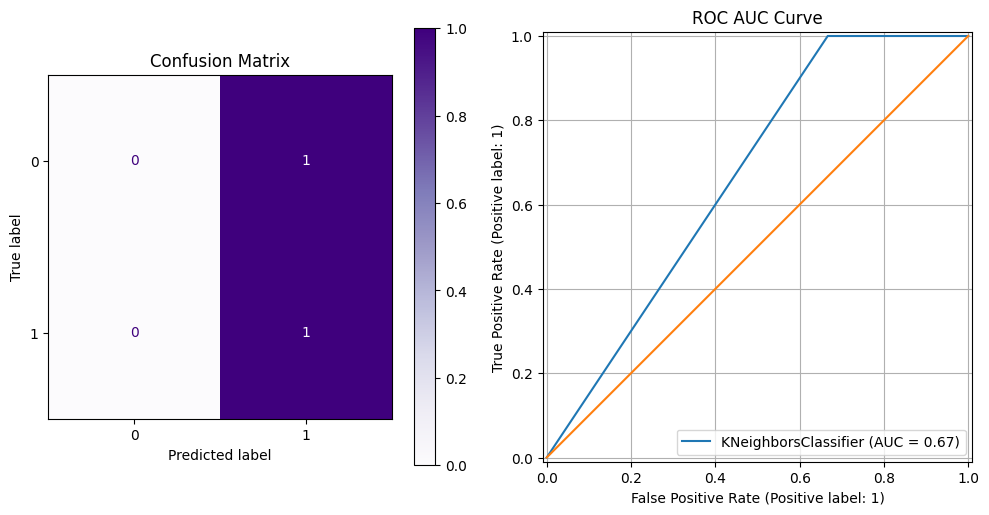

KNeighborsClassifier(n_neighbors=15)

In [17]:
fit_eval(KNeighborsClassifier(n_neighbors=15), \
                      scaled_X_train, y_train, \
                      X_test, y_test)

Мы видим, что контраста между нестандартизированными и стандартизированными данными нет. Однако это абсолютно возможный исход событий: стандартизация не всегда приносит результат. И наша модель в нашем исследовании это было доказано.

Мы провели исследование на тему k-ближайших соседей. Целевым признаком стал процент побед, и мы добивались максимальных результатов 0.6-0.7, что явно неплохо, но не идеально. Причиной может служить средний уровень качества данных. Мы рассмотрели разные вариации с разным количеством соседей. Более того, мы стандартизировали данные, и результативность данного действия не оказала особого влияния. Исследование законечно.